<a href="https://colab.research.google.com/github/ZohanaZuthi/Machine_Learning_Algorithm_Udemy/blob/main/Reinforcement_learning_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Upper Confidence Bound (UCB)**

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the dataset

In [5]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [6]:
import math
# total number of round or users
N=10000
# the number of ads
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if (numbers_of_selections[i]>0):
       av_reward=sums_of_rewards[i]/numbers_of_selections[i]
       delta_i=math.sqrt(3/2*(math.log(n+1)/numbers_of_selections[i]))
       upper_bound=av_reward+delta_i
    else:
       upper_bound=1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward=dataset.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_reward+=reward


## Visualizing the results

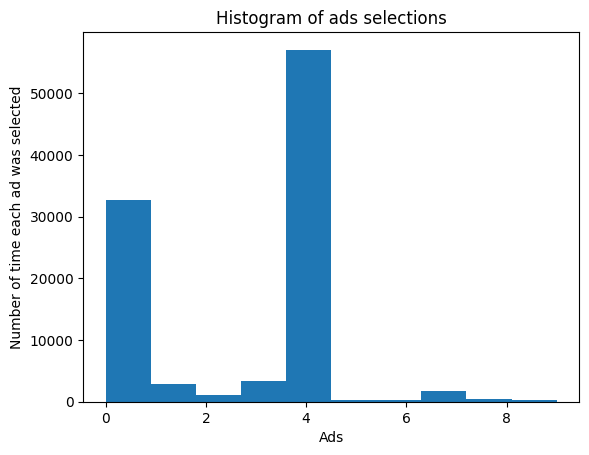

In [7]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of time each ad was selected")
plt.show()